# 2. Frequency-Domain Analysis

In [1]:
import os
import sys

In [2]:
import librosa
import librosa.display
import sounddevice as sd

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.signal import hilbert, find_peaks

In [5]:
audio_path = librosa.example('trumpet')
signal, sr = librosa.load(audio_path, sr=None)

---

## Short-Time Fourier Transform (STFT)

Concept:
Definition: The STFT is a technique to analyze a signal's frequency content over time. It involves dividing the signal into overlapping segments (or windows) and computing the Fourier Transform for each segment.
Purpose: STFT helps in understanding how the frequency components of a signal change over time, providing a time-frequency representation.
Mathematical Representation:
The STFT of a signal $(t)$ is given by:

$STFT{x(t)}(t, f) = ∫ x(τ) w(t - τ) e^{(-j 2 π f τ)} dτ$

where:

$w(t - τ)$ is a window function centered at $t$.

$f$ is the frequency.

$t$ is the time.

In [12]:
# Compute the Short-Time Fourier Transform (STFT)
D = librosa.stft(signal, n_fft=2048, hop_length=512, window='hann')

# Convert amplitude to decibels
DB = librosa.amplitude_to_db(np.abs(D), ref=np.max)

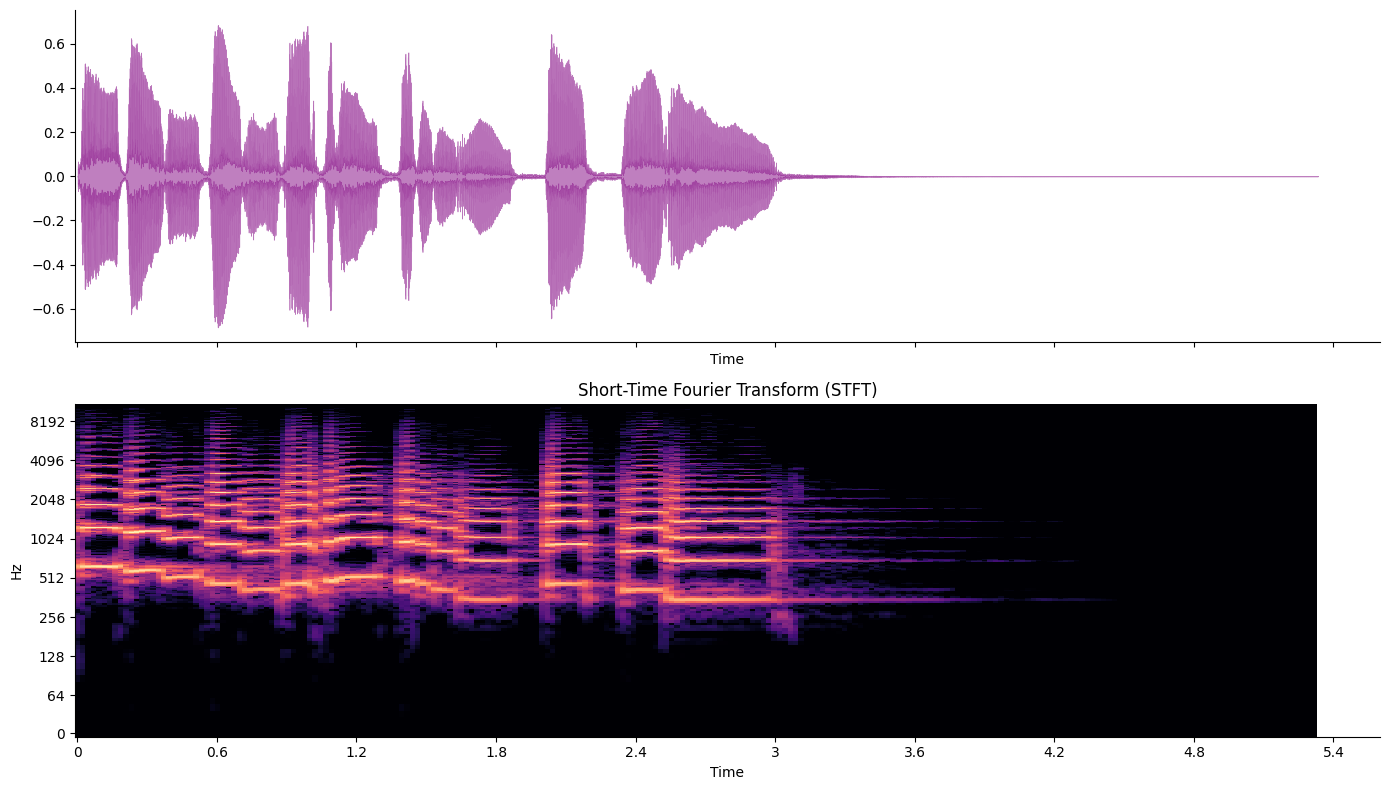

In [38]:
# Plot the STFT
fig, axs = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

librosa.display.waveshow(signal, sr=sr, alpha=.5, lw=.5, color='purple', ax=axs[0])

librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='log')

plt.title('Short-Time Fourier Transform (STFT)')

plt.tight_layout()

sns.despine()

plt.show()

## Mel Spectrogram

 A Mel Spectrogram is a variation of the Spectrogram where the frequency axis is transformed to the Mel scale. The Mel scale is designed to mimic human hearing perception, emphasizing lower frequencies more than higher ones.

The Mel Spectrogram provides a frequency representation of a signal that is more aligned with human auditory perception, making it particularly useful for tasks like speech recognition and music analysis.

- **Mel Frequency Scale:** The Mel scale is a perceptual scale of pitches. It is nonlinear and spaced according to how humans perceive different frequencies. This is done to reflect how the human ear's frequency resolution varies across different frequencies.

$Mel(f) = 2595 * log10(1 + f / 700)$



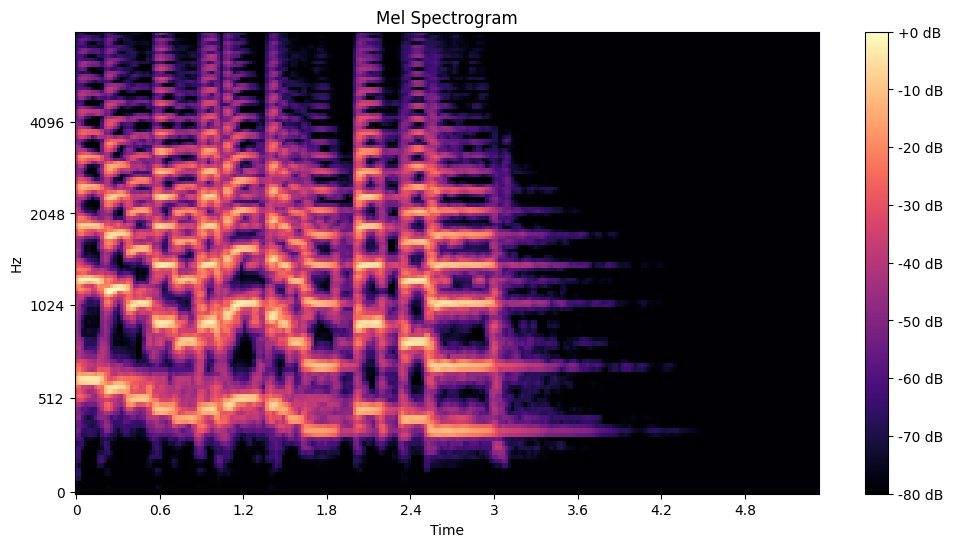

In [40]:
# Compute the Short-Time Fourier Transform (STFT)
D = librosa.stft(signal, n_fft=2048, hop_length=512, window='hann')

# Compute the Mel Spectrogram
S = librosa.feature.melspectrogram(y=signal, sr=sr, n_fft=2048, hop_length=512, n_mels=128, fmax=8000)

# Convert amplitude to decibels
S_DB = librosa.power_to_db(S, ref=np.max)

# Plot the Mel Spectrogram
plt.figure(figsize=(12, 6))
librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
plt.title('Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()


- **Speech Recognition:** Mel Spectrograms are often used as input features for automatic speech recognition (ASR) systems. The Mel scale’s alignment with human auditory perception helps in extracting features that are more relevant for recognizing spoken words.

- **Music Analysis:** In music, Mel Spectrograms help in genre classification, music transcription, and instrument recognition by providing a perceptually relevant frequency representation.

- **Audio Synthesis:** Mel Spectrograms are used in audio synthesis tasks such as creating sound from text or generating musical sounds from non-musical sources.

Considerations

- **Number of Mel Bands:** The choice of n_mels affects the granularity of the frequency representation. More Mel bands provide finer frequency resolution but may increase computational complexity.

- **Frequency Range (fmax):** The maximum frequency (fmax) should be set according to the signal of interest. For instance, in speech analysis, fmax can be around 8000 Hz, while for music, it might be higher.

- **Decibel Conversion:** Converting the Mel Spectrogram to decibels enhances contrast and makes it easier to visualize features. This is particularly useful for analyzing dynamic ranges and spectral details.

---

## Constant-Q Transform (CQT)

**Concept**

The Constant-Q Transform (CQT) is a time-frequency representation that provides a logarithmic frequency scale, meaning that the frequency bins are spaced logarithmically. This is particularly useful for analyzing musical signals, as it matches the perceptual spacing of musical notes.

The CQT is designed to better represent musical pitch and harmonics, where lower frequencies are more closely spaced than higher frequencies, mimicking how musical scales are perceived.

**Frequency Bins:** Unlike the Short-Time Fourier Transform (STFT), where frequency bins are linearly spaced, the CQT uses a logarithmic scale:

$f_n = f_0 \cdot 2^{n/Q}$

where:

$f_n$ is the frequency of the 𝑛-th bin,

$𝑓_0$ is the reference frequency (usually the lowest frequency bin),

$Q$ is the quality factor of the transform.


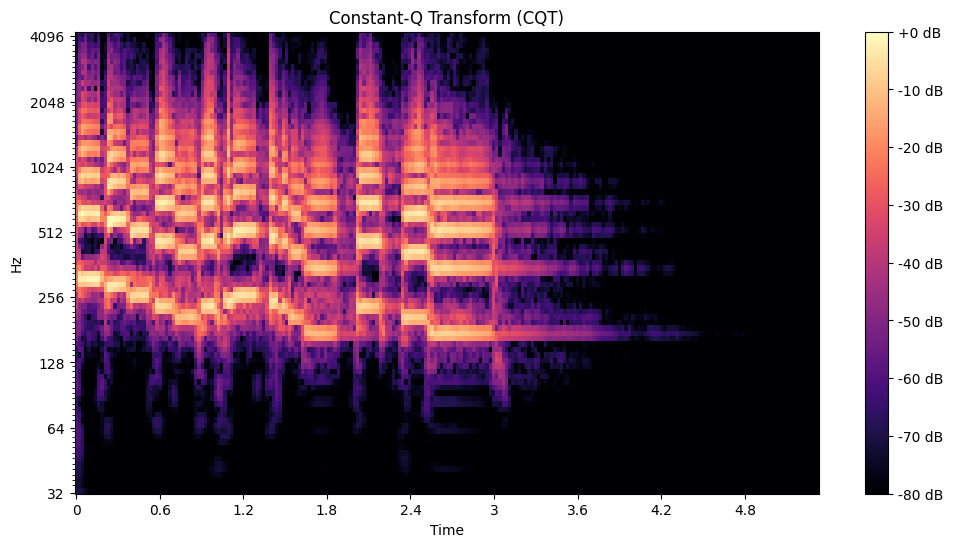

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Load an example audio file
audio_path = librosa.example('trumpet')
y, sr = librosa.load(audio_path, sr=None)

# Compute the Constant-Q Transform (CQT)
C = librosa.cqt(y, sr=sr, n_bins=85, fmin=librosa.note_to_hz('C2'))

# Convert amplitude to decibels
C_DB = librosa.amplitude_to_db(np.abs(C), ref=np.max)

# Plot the Constant-Q Transform
plt.figure(figsize=(12, 6))
librosa.display.specshow(C_DB, sr=sr, x_axis='time', y_axis='cqt_hz', bins_per_octave=12)
plt.title('Constant-Q Transform (CQT)')
plt.colorbar(format='%+2.0f dB')
plt.show()


**Music Analysis:** Extracting pitch and harmonic content, analyzing musical scales and chords.

**Tuning and Transcription:** Useful in automatic music transcription and tuning algorithms.

**Frequency Resolution:** The logarithmic spacing makes CQT particularly well-suited for musical signals, but it may not be as effective for non-musical signals.

**Quality Factor (Q):** Adjusting Q affects the trade-off between frequency resolution and temporal resolution.


---

### **Differences Between Constant-Q Transform (CQT) and Mel Spectrogram**

#### **1. Frequency Scale**

- **Constant-Q Transform (CQT)**
  - **Frequency Scale**: Logarithmic
  - **Description**: Frequencies are spaced logarithmically, which matches the musical scale. This is beneficial for capturing musical notes and harmonic content because lower frequencies have more resolution compared to higher frequencies.

- **Mel Spectrogram**
  - **Frequency Scale**: Mel scale (approximate logarithmic spacing)
  - **Description**: Frequencies are spaced according to the Mel scale, which approximates human auditory perception. Lower frequencies are more detailed, while higher frequencies are compressed. This scale is designed to align with how humans perceive pitch differences.

#### **2. Application Focus**

- **Constant-Q Transform (CQT)**
  - **Primary Use**: Musical analysis and pitch extraction
  - **Description**: Specifically tailored for music and pitch-related tasks. The logarithmic spacing of frequencies makes it well-suited for analyzing musical scales, chords, and harmonic content.

- **Mel Spectrogram**
  - **Primary Use**: General audio analysis, speech processing
  - **Description**: Used for tasks requiring a perceptual representation of frequency content, such as speech recognition and general audio classification. It provides a representation that aligns with human auditory perception but is less focused on musical notes.

#### **3. Frequency Resolution**

- **Constant-Q Transform (CQT)**
  - **Frequency Resolution**: Higher resolution at lower frequencies
  - **Description**: The resolution is designed to be better at lower frequencies, which is useful for capturing musical pitches where the resolution needs to be finer for lower notes.

- **Mel Spectrogram**
  - **Frequency Resolution**: Variable, with better resolution at lower frequencies
  - **Description**: Provides a balance between frequency and time resolution, with higher resolution at lower frequencies and more compressed bins at higher frequencies. This is effective for capturing perceptual features across the audio spectrum.

#### **4. Computational Complexity**

- **Constant-Q Transform (CQT)**
  - **Computational Complexity**: Generally higher
  - **Description**: The logarithmic frequency bins can lead to higher computational complexity, especially for a large number of bins.

- **Mel Spectrogram**
  - **Computational Complexity**: Generally lower
  - **Description**: Uses linearly spaced bins within the Mel scale, which can be more computationally efficient compared to the logarithmic spacing of CQT.

#### **5. Visualization**

- **Constant-Q Transform (CQT)**
  - **Visualization**: Displays harmonic content with a focus on musical notes
  - **Description**: Shows detailed harmonic structure and pitch information, making it easy to visualize musical features and patterns.

- **Mel Spectrogram**
  - **Visualization**: Displays frequency content with perceptual relevance
  - **Description**: Provides a perceptually relevant view of frequency content, which is useful for general audio analysis and recognizing patterns based on human hearing.

#### **Summary**

- **CQT**: 
  - Logarithmic frequency scale
  - Best for musical analysis and pitch extraction
  - Higher frequency resolution at lower frequencies
  - Higher computational complexity

- **Mel Spectrogram**: 
  - Mel scale frequency spacing
  - General audio and speech analysis
  - Variable frequency resolution with emphasis on lower frequencies
  - Generally lower computational complexity

---

## Chromagram

1. Concept and Purpose

A Chromagram represents the 12 pitch classes of the chromatic scale in an audio signal. It captures the harmonic content by summing the energy of each pitch class across the time-domain signal.

It is used to analyze the harmonic structure of music by highlighting the presence of specific musical notes or chords. This is particularly useful for tasks like chord recognition, key detection, and music retrieval.

2. Calculation and Representation

The Chromagram maps the frequency content of a signal to the 12 pitch classes (C, C#, D, D#, E, F, F#, G, G#, A, A#, B), representing the notes of the chromatic scale.

3. Computation:

**Fourier Transform:** Compute the Short-Time Fourier Transform (STFT) or another frequency-domain representation.

**Pitch Mapping:** Map the frequency bins to the 12 pitch classes using a filter bank or harmonic summation.

**Summing Energies:** Sum the energy in each pitch class to create the Chromagram.

In [53]:
# Compute the Chromagram
chromagram = librosa.feature.chroma_cqt(y=y, sr=sr)

# Define the chromatic scale notes
chromatic_notes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

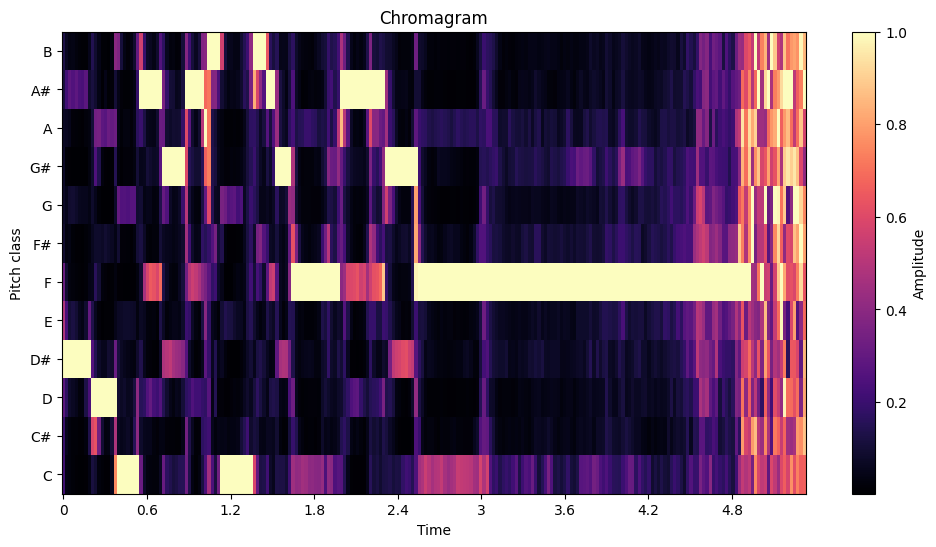

In [60]:

# Plot the Chromagram
plt.figure(figsize=(12, 6))
librosa.display.specshow(chromagram, sr=sr, x_axis='time', y_axis='chroma')

# Add note labels to the y-axis
plt.yticks(ticks=np.arange(len(chromatic_notes)), labels=chromatic_notes)

plt.title('Chromagram')
plt.colorbar(label='Amplitude')
plt.show()
